In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating the random numbers
X = np.random.rand(800,1)

In [3]:
y = 3*X + np.random.randn(800,1)

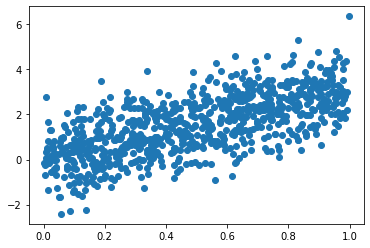

In [4]:
plt.scatter(X,y)

In [5]:
# Splitting the Data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size = 0.20, random_state=42)

In [6]:
# Trainig the model
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon= 0.001)
svm_reg.fit(X_train,y_train)

/home/saksham/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saksham/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=0.001)

In [7]:
y_pred = svm_reg.predict(X_test)

In [8]:
y_pred

array([2.27938737, 2.29603308, 2.32989043, 2.37217352, 2.26162701,
       0.80947519, 1.11031667, 2.44395127, 2.05155318, 0.89128359,
       0.82519164, 2.68700994, 0.99570368, 0.90147174, 2.08927165,
       2.92955095, 0.978691  , 1.57728007, 2.25534869, 0.57517505,
       0.90910078, 2.59923219, 2.28752328, 0.49705944, 2.29017607,
       2.91473197, 1.97930772, 0.56457544, 0.55201556, 1.99881132,
       0.09830202, 1.30282927, 0.19254294, 2.29324744, 0.5358145 ,
       1.49631819, 0.75752982, 2.87391185, 1.09328832, 2.4414361 ,
       3.06146193, 1.95919203, 0.27997506, 0.65992364, 1.98902657,
       1.64709703, 2.03456251, 1.19680175, 2.08769771, 2.56322325,
       2.47470087, 0.21369796, 2.04988911, 2.38845081, 1.85246163,
       2.22119469, 0.87146716, 1.86739272, 2.1990041 , 0.86226958,
       0.22517   , 1.49702731, 0.19321737, 2.35306119, 1.08510387,
       2.49359356, 0.21716025, 0.60085993, 1.74384821, 2.45303822,
       0.81874482, 2.07261887, 0.79815493, 2.94291719, 3.04181

### Evaluating the model

In [9]:
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score

In [10]:
mse = mean_squared_error(y_test ,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
def evaluation(y_test,y_pred):
    mse = mean_squared_error(y_test ,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"The mean squred error is:: {mse}")
    print(f"The mean absolute error is:: {mae}")
    print(f"The r2_score of the model is:: {r2}")

In [12]:
evaluation(y_test,y_pred)

The mean squred error is:: 0.968323004387663
The mean absolute error is:: 0.7771759471492319
The r2_score of the model is:: 0.42805850624714625


### Scatter Plot:: Actual vs Predicted

Text(0.5, 1.0, 'Actual vs Predicted Values (LinearSVR)')

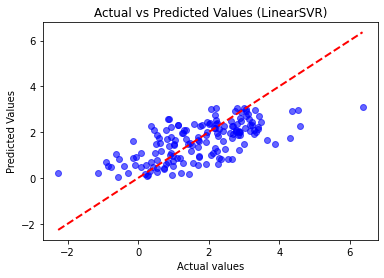

In [13]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred,color = "blue", alpha = 0.6)
# Perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (LinearSVR)")

### BaseLine Model

In [14]:
# Baseline prediction: Calulate the mean of y_test and assign it to all the test instance prediciton
y_baseline_pred = np.full_like(y_test , fill_value =np.mean(y_train))
# Evaluation 
evaluation(y_test,y_baseline_pred)

The mean squred error is:: 1.7439997627039574
The mean absolute error is:: 1.081657124056823
The r2_score of the model is:: -0.03009618161069083


## Fold(Cross) Validation

In [18]:
# It splits the data into K folds
# For each fold : train the model on K-1 fold and test on the remaining fold
# Repeat for all K folds and then average the scores

In [19]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [21]:
linear_svm_pipeline = Pipeline([
("Scaler", StandardScaler()),
("svm", LinearSVR(epsilon =0.001, C=0.1))
])

In [22]:
scores = cross_val_score(linear_svm_pipeline,X_train, y_train, cv =6 , scoring = "r2")

/home/saksham/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saksham/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/saksham/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saksham/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the 

In [23]:
scores

array([0.43653321, 0.44280646, 0.40763667, 0.54882325, 0.45623194,
       0.35512789])

In [24]:
scores.mean()

0.44119323615620787

## GridSearchCV

In [25]:
# It is a hyperparameter tuning tool that helps you automatically find the best combination
# of your model using cross validation. Every ML model have some set of hyperparmeter like 
# c ,epsilon , kernel etc in SVM. There are the parameter that are not learned form the data 
# you have to set them manually.
# Instead of guessing with hyperpartmeter is best , GridSearchCV: 
# Tries all combination of hyperparameters you provide and for each combination of hyperparameter 
# It trains and evalustes the model using cross validation.

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
grid_pipeline = Pipeline([
    ("standared" , StandardScaler()),
    ("svm", LinearSVR())
])

In [29]:
parm_grid = {
    'svm__epsilon' : [0.001,0.01,0.1,1,10,20,100],
    'svm__C' : [ 0.001,0.1,1,10,20,50,100]
}
grid_search = GridSearchCV(grid_pipeline, parm_grid, cv =5, scoring = "r2")

In [30]:
grid_search.fit(X_train, y_train)

/home/saksham/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saksham/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/saksham/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/saksham/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standared', StandardScaler()),
                                       ('svm', LinearSVR())]),
             param_grid={'svm__C': [0.001, 0.1, 1, 10, 20, 50, 100],
                         'svm__epsilon': [0.001, 0.01, 0.1, 1, 10, 20, 100]},
             scoring='r2')

In [31]:
# Result 
print("Best parameteres::" , grid_search.best_params_)
print("Best R2::" , grid_search.best_score_)

Best parameteres:: {'svm__C': 50, 'svm__epsilon': 0.01}
Best R2:: 0.44137648385748063
